In [20]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import pie, axis, show
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [21]:
# read in csv file and create variable for column names
col_names = ['recipe_id','recipe_title', 'url','vote_count','rating', 'course','diet', 'prep_time','cook_time',
             'total_time','ingredients','instructions','author','category']
df = pd.read_csv(r'C:\Users\marce\OneDrive\Desktop\Capstone_Final\food_recipes.csv', names = col_names)
df.head()

,recipe_id,recipe_title,url,vote_count,rating,course,diet,prep_time,cook_time,total_time,ingredients,instructions,author,category
0,1,Achari Chicken Masala Pasta Recipe,https://www.archanaskitchen.com/achari-chicken...,927,4.94,Dinner,Non Vegeterian,10,30,40,Nutralite Garlic & Oregano Spread|Garlic|Onion...,To begin making the Achari Chicken Masala Past...,Archana's Kitchen,Pasta Recipes
1,2,Baked Polenta Fries Recipe,https://www.archanaskitchen.com/baked-polenta-...,1911,4.95,Appetizer,Vegetarian,30,30,60,Polenta|Water|Milk|Butter (Salted)|Mixed Herbs...,To begin making Baked Polenta Fries Recipes fi...,Archana's Kitchen,Continental Party Appetizer & Starter Recipes
2,3,Beet Apple Salad Recipe with Apple Cider Vina...,https://www.archanaskitchen.com/beet-apple-sal...,789,4.93,Appetizer,Vegetarian,5,20,25,Apples|Beetroots|Salad leaves|Black olives|Wal...,To begin making the Beet Apple Salad Recipe wi...,Archana's Kitchen,Salad Recipes
3,4,Grated Carrot Cucumber Tomato Raita Recipe,https://www.archanaskitchen.com/cucumber-green...,1476,4.87,Side Dish,Vegetarian,15,0,15,Cucumber|Tomato|Carrot (Gajjar)|Green Chilli|C...,To begin making the Cucumber Green Chilli Rait...,Archana's Kitchen,Indian Raita Recipes
4,5,Kerala Style Sugiyan Recipe (Sweet Moong Dal ...,https://www.archanaskitchen.com/kerala-style-s...,2669,4.90,Snack,Vegetarian,60,30,90,Green Moong Dal (Whole)|Jaggery|Cardamom Powde...,To begin making the Kerala Style Sugiyan Recip...,Archana's Kitchen,Indian Snack Recipes


In [22]:
#fill NaN values with 'Other' category
df['diet'] = df['diet'].fillna(value= 'Other')

# combine plant based categories
df['diet'] = df['diet'].replace(['Vegetarian', 'High Protein Vegetarian','Vegan'], 'Plant Based')

# combine carnivorous categories
df['diet'] = df['diet'].replace(['Non Vegeterian', 'High Protein Non Vegetarian','Eggetarian'], 'Other')

# combine other categories
df['diet'] = df['diet'].replace(['Sugar Free Diet', 'No Onion No Garlic (Sattvic)','Diabetic Friendly','Gluten Free'], 'Other')

print(df['diet'].unique())

['Other' 'Plant Based']


In [23]:
#clean up courses
#use unique function to return a list of values from 'course' column
print(df['course'].unique())

['Dinner' 'Appetizer' 'Side Dish' 'Snack' 'Lunch' 'Indian Breakfast'
 'One Pot Dish' 'Dessert' 'Main Course' nan 'South Indian Breakfast'
 'North Indian Breakfast' 'World Breakfast' 'Brunch']


In [24]:
#fill NaN values with 'Other' category
df['course'] = df['course'].fillna(value= 'Other')

# combine all breakfast courses under general 'Breakfast' label
df['course'] = df['course'].replace(['North Indian Breakfast','World Breakfast','South Indian Breakfast','Brunch','Indian Breakfast'], 'Breakfast')

#Combine dinner categories
df['course'] = df['course'].replace(['Main Course', 'One Pot Dish'], 'Dinner')

# combine apps and sides categories
df['course'] = df['course'].replace(['Appetizer', 'Side Dish'], 'Snack')

print(df['course'].unique())

['Dinner' 'Snack' 'Lunch' 'Breakfast' 'Dessert' 'Other']


In [25]:
# Drop unnecessary columns
df = df.drop(columns=['url', 'author','category','prep_time','cook_time'])

In [26]:
# Make copy of data set for analysis
df_clean = df

# Descriptive Methods

The following section of the program will begin analyzing the data through various descriptive methods and visualizations. The insights from this section will help determine the non-descriptive methods used later in the program

In [28]:
df_clean['diet'].value_counts()

Plant Based    5112
Other          1467
Name: diet, dtype: int64

<AxesSubplot:xlabel='diet', ylabel='count'>

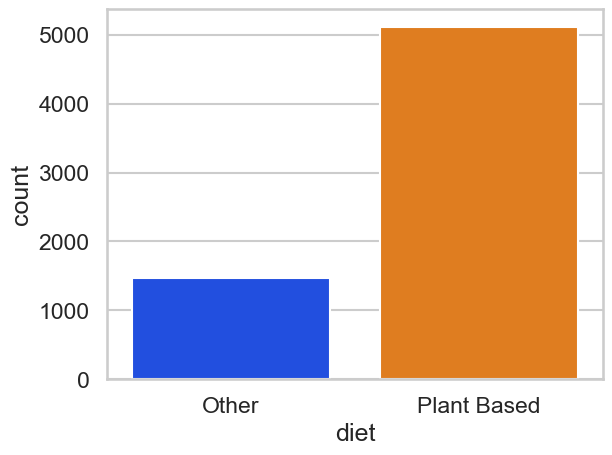

In [29]:
#simple countplot to view dietary data and comparison 
sns.set_context('talk')
sns.set_style('whitegrid')
plt.ylabel('Number of Recipes')
sns.countplot(x='diet',data=df_clean,palette='bright')

In [30]:
# view course data and create visualizations to represent comparisons
df_clean['course'].value_counts()

Snack        2520
Lunch        1406
Dinner       1049
Breakfast     736
Dessert       728
Other         140
Name: course, dtype: int64

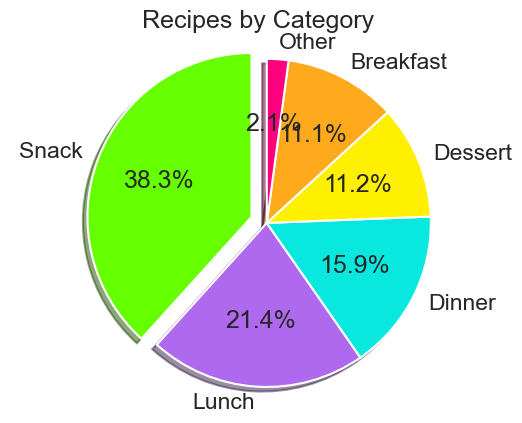

In [31]:
#create pie chart to view course types in data set
labels = 'Snack', 'Lunch', 'Dinner','Dessert','Breakfast','Other'
colors = ['#66FF00','#AF69EE','#08E8DE','#FFF000','#FFAA1D','#FF007F']
value_list = df_clean['course'].value_counts()
explode = (0.1,0,0,0,0,0)

fig1, ax1 = plt.subplots()
ax1.pie(value_list, explode = explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Recipes by Category")
plt.show()

In [32]:
# create histogram for numerical representation of the number of recipes 
# distributed across the different course categories

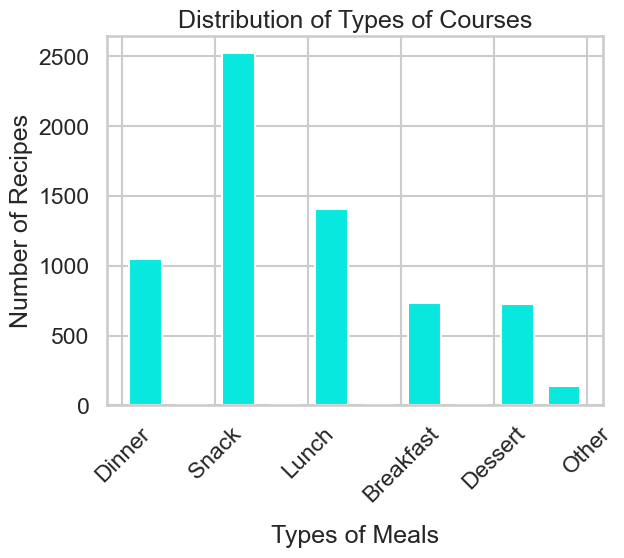

In [33]:
#create histogram to look at the total number of each course
df_clean['course'].hist(rwidth=0.7,color = '#08E8DE')
plt.xlabel("Types of Meals",labelpad=14)
plt.ylabel("Number of Recipes")
plt.title("Distribution of Types of Courses")
figsize=(10,20)
plt.xticks(rotation = 45)
plt.show()

Text(468.01587301587307, 0.5, 'Time')

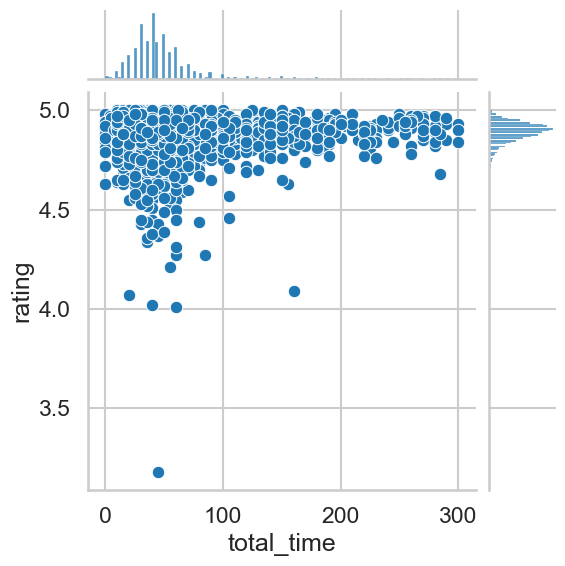

In [34]:
# jointplot to view the correlation between the total time a recipe takes to complete 
# and the rating

sns.jointplot(x='total_time',y='rating',data=df_clean)
plt.xlabel('Ratings',labelpad=14,)
plt.ylabel('Time',labelpad=14)

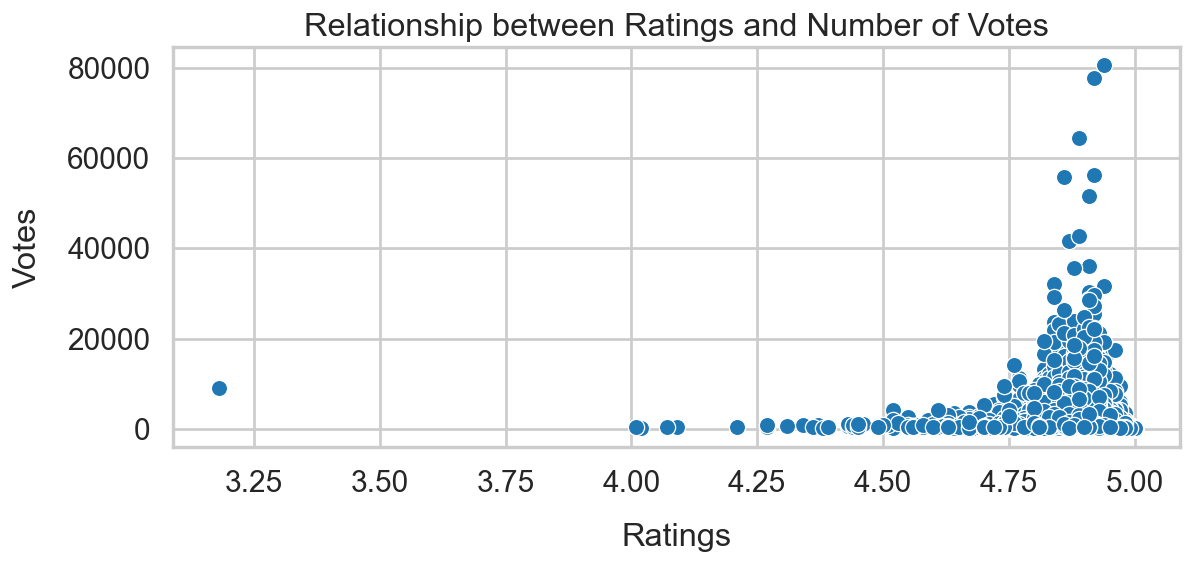

In [36]:
#Create scatterplot do demonstrate the relationship between Ratings and number of votes
plt.figure(figsize=(10,4), dpi =130)
sns.scatterplot(data = df, x='rating', y='vote_count');
plt.xlabel('Ratings',labelpad=14,)
plt.ylabel('Votes',labelpad=14)
plt.title('Relationship between Ratings and Number of Votes')
plt.labelpad =14

# Non-desciptive method

Now that the data has been viewed and anazlyed, the program will begin to build a nondescriptive model

In [37]:
#create new copy of data and remove categorical columns
df_model = df_clean
df_model.head()

,recipe_id,recipe_title,vote_count,rating,course,diet,total_time,ingredients,instructions
0,1,Achari Chicken Masala Pasta Recipe,927,4.94,Dinner,Other,40,Nutralite Garlic & Oregano Spread|Garlic|Onion...,To begin making the Achari Chicken Masala Past...
1,2,Baked Polenta Fries Recipe,1911,4.95,Snack,Plant Based,60,Polenta|Water|Milk|Butter (Salted)|Mixed Herbs...,To begin making Baked Polenta Fries Recipes fi...
2,3,Beet Apple Salad Recipe with Apple Cider Vina...,789,4.93,Snack,Plant Based,25,Apples|Beetroots|Salad leaves|Black olives|Wal...,To begin making the Beet Apple Salad Recipe wi...
3,4,Grated Carrot Cucumber Tomato Raita Recipe,1476,4.87,Snack,Plant Based,15,Cucumber|Tomato|Carrot (Gajjar)|Green Chilli|C...,To begin making the Cucumber Green Chilli Rait...
4,5,Kerala Style Sugiyan Recipe (Sweet Moong Dal ...,2669,4.90,Snack,Plant Based,90,Green Moong Dal (Whole)|Jaggery|Cardamom Powde...,To begin making the Kerala Style Sugiyan Recip...


In [38]:
df_model = df_model.drop(columns=['recipe_title','ingredients','instructions','course'])
df_model.head()

,recipe_id,vote_count,rating,diet,total_time
0,1,927,4.94,Other,40
1,2,1911,4.95,Plant Based,60
2,3,789,4.93,Plant Based,25
3,4,1476,4.87,Plant Based,15
4,5,2669,4.90,Plant Based,90


In [39]:
 #view categorical figures for conversion
df_model.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6579 entries, 0 to 6578
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   recipe_id   6579 non-null   int64  
 1   vote_count  6579 non-null   int64  
 2   rating      6579 non-null   float64
 3   diet        6579 non-null   object 
 4   total_time  6579 non-null   int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 257.1+ KB


In [41]:
# diet needs to be transformed using the get_dummies function. convert diet categories to 1 and 0
# this will serve as a 'yes/no'

dietary = pd.get_dummies(df_model['diet'],drop_first=True)
# check with head()
# dietary.head()

# add the new column to the dataset for Plant Based, verify output
df_model = pd.concat([df_model,dietary],axis=1)
df_model.head()

,recipe_id,vote_count,rating,diet,total_time,Plant Based
0,1,927,4.94,Other,40,0
1,2,1911,4.95,Plant Based,60,1
2,3,789,4.93,Plant Based,25,1
3,4,1476,4.87,Plant Based,15,1
4,5,2669,4.90,Plant Based,90,1


In [42]:
#drop the diet column (replaced with Plant Based so no longer needed)
df_model.drop(['diet'],axis=1,inplace=True)
df_model.head()

,recipe_id,vote_count,rating,total_time,Plant Based
0,1,927,4.94,40,0
1,2,1911,4.95,60,1
2,3,789,4.93,25,1
3,4,1476,4.87,15,1
4,5,2669,4.90,90,1


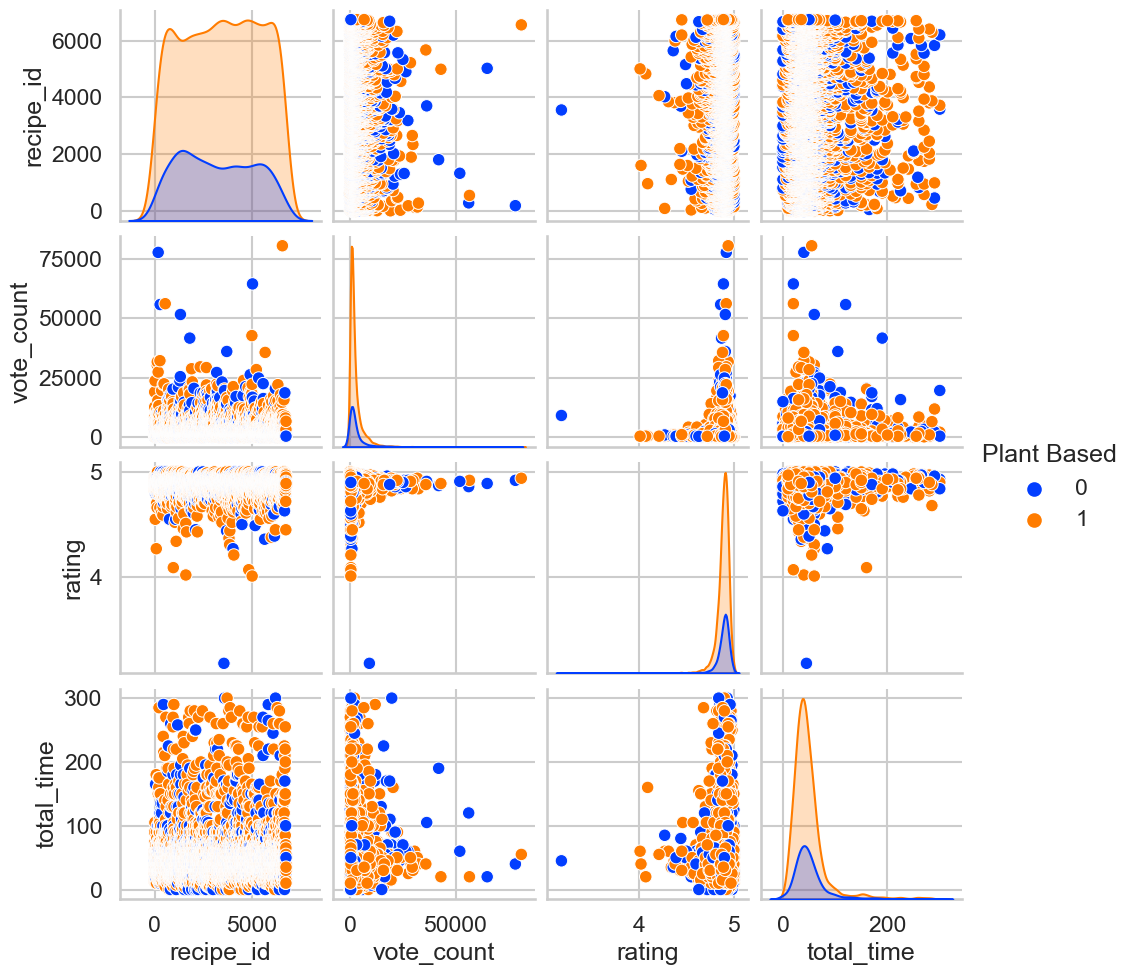

In [49]:
# Data is clean and ready to be used in the decision tree model
# create pairplot to visualize numerical correlation of Plant Based (Diet) column and the other columns from the data set
sns.pairplot(df_model,hue='Plant Based',palette='bright')

In [50]:
# prepare data for training
from sklearn.model_selection import train_test_split

In [53]:
#create and train decision tree
X = df_model.drop('Plant Based',axis=1)
y= df_model['Plant Based']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.tree import DecisionTreeClassifier
tree = DecisionTreeClassifier()
tree.fit(X_train,y_train)

DecisionTreeClassifier()

In [54]:
# view classification report
prediction = tree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.30      0.35      0.32       479
           1       0.81      0.77      0.79      1693

    accuracy                           0.68      2172
   macro avg       0.55      0.56      0.55      2172
weighted avg       0.69      0.68      0.68      2172



In [55]:
#view confusion matrix
print(confusion_matrix(y_test,prediction))

[[ 166  313]
 [ 389 1304]]


# Recommendation System and Main Program

The next section of the program utilizes the decision tree to develop a recommendation system that takes in the users dietary restritions and outputs a list of recommended recipes based on rating and vote count

In [57]:
#main program for user
import ipywidgets as widgets
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual

dfMain = df_clean
dfMain.head()

,recipe_id,recipe_title,vote_count,rating,course,diet,total_time,ingredients,instructions
0,1,Achari Chicken Masala Pasta Recipe,927,4.94,Dinner,Other,40,Nutralite Garlic & Oregano Spread|Garlic|Onion...,To begin making the Achari Chicken Masala Past...
1,2,Baked Polenta Fries Recipe,1911,4.95,Snack,Plant Based,60,Polenta|Water|Milk|Butter (Salted)|Mixed Herbs...,To begin making Baked Polenta Fries Recipes fi...
2,3,Beet Apple Salad Recipe with Apple Cider Vina...,789,4.93,Snack,Plant Based,25,Apples|Beetroots|Salad leaves|Black olives|Wal...,To begin making the Beet Apple Salad Recipe wi...
3,4,Grated Carrot Cucumber Tomato Raita Recipe,1476,4.87,Snack,Plant Based,15,Cucumber|Tomato|Carrot (Gajjar)|Green Chilli|C...,To begin making the Cucumber Green Chilli Rait...
4,5,Kerala Style Sugiyan Recipe (Sweet Moong Dal ...,2669,4.90,Snack,Plant Based,90,Green Moong Dal (Whole)|Jaggery|Cardamom Powde...,To begin making the Kerala Style Sugiyan Recip...


In [80]:
dietbox = widgets.Checkbox(
    value=False,
    description='Is your Diet Plant Based?',
    disabled=False)
dietbox

Checkbox(value=False, description='Is your Diet Plant Based?')

In [87]:
if dietbox.value == True:
    print("You are Plant Based. Here are some recipe recommendations for your diet:")
else:
    print("You are NOT Plant Based. Here are some recipe recommendations for your diet:")

You are Plant Based. Here are some recipe recommendations for your diet:


In [88]:
#define function for rating and compute bayesian rating
def compute_rating (x, m=m, C=C):
    v = x['vote_count']
    R = x['rating']
    return (v/(v+m)* R) +(m/(m+v)) * C

#recommendations based on user input
if dietbox.value == True:
    df_plant = dfMain[dfMain.diet != 'Other']
    C = df_plant['rating'].mean()
    m = df_plant['vote_count'].mean()
    m = df_plant['vote_count'].quantile(0.9)
    
    #filter out recipes into independent dataframe
    q_recipes = df_plant.copy().loc[dfMain['vote_count'] >= m]
    q_recipes.shape
    
    # create new column for 'score' to hold new rating
    q_recipes['score'] = q_recipes.apply(compute_rating, axis=1)
    q_recipes = q_recipes.sort_values('score', ascending=False)
   
    #print top 5 recipes
    print(q_recipes[['recipe_id','recipe_title','diet','vote_count', 'rating','score']].head(5))
else:
    df_plant = dfMain[dfMain.diet != 'Plant Based']
    C = df_plant['rating'].mean()
    m = df_plant['vote_count'].mean()
    m = df_plant['vote_count'].quantile(0.9)
    
    #filter out recipes into independent dataframe
    q_recipes = df_plant.copy().loc[dfMain['vote_count'] >= m]
    q_recipes.shape
    
    # create new column for 'score' to hold new rating
    q_recipes['score'] = q_recipes.apply(compute_rating, axis=1)
    q_recipes = q_recipes.sort_values('score', ascending=False)
   
    #print top 5 recipes
    print(q_recipes[['recipe_id','recipe_title','diet','vote_count', 'rating','score']].head(5))

      recipe_id                                       recipe_title  \
1667       1697                             Crustless Zucchini Pie   
6397       6556                 Vegetarian Thai Green Curry Recipe   
5167       5300                 Roasted Vegetable Au Gratin Recipe   
1363       1387                       Chilli Cheese Paratha Recipe   
136         141  Aloo Simla Mirch Ki Sabzi Recipe - Aloo & Caps...   

             diet  vote_count  rating     score  
1667  Plant Based        9602    4.97  4.937519  
6397  Plant Based       80628    4.94  4.936234  
5167  Plant Based       11240    4.96  4.934168  
1363  Plant Based       16984    4.95  4.933251  
136   Plant Based       31730    4.94  4.931408  
